In [1]:
cd drive/MyDrive/JAIST/Research/RL/movie-lens-simulator

/content/drive/MyDrive/JAIST/Research/RL/movie-lens-simulator


In [2]:
import os
import torch

dirs = ['AC', 'SAC', 'DDPG']
exps = ['exp1', 'exp2', 'exp3']
metrics = {}

for dir in dirs:
    log = None
    for idx, exp in enumerate(exps):
        path = os.path.join('./log/{d}/{e}/log_metrics.csv'.format(d=dir, e=exp))
        if idx == 0:
            log = torch.load(path)
        if idx > 0:
            log += torch.load(path)
    
    metrics[dir] = log / 3

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def draw_single(metrics, col, figure_num):
    plt.plot(np.arange(len(metrics['AC'][col])), metrics['AC'][col], label='Actor Critic')
    plt.plot(np.arange(len(metrics['SAC'][col])), metrics['SAC'][col], label='Soft Actor Critic')
    plt.plot(np.arange(len(metrics['DDPG'][col])), metrics['DDPG'][col], label='DDPG')
    plt.legend()
    plt.xlabel('time', fontsize=16)
    plt.ylabel('metrics score', fontsize=16)
    plt.title('Figure {}, {} over time'.format(figure_num, col), fontsize=18)


In [4]:
metrics['AC']

,MAP,MEAN_PRECISION,MRR,DIVERSITY,SERENDIPITY,NOVELTY,UNIQUENESS
0,0.520800,0.421766,0.579683,484.725578,120.037821,5.837288,145.166667
1,0.565132,0.531291,0.560715,599.732009,114.528256,2.132010,93.400000
2,0.567324,0.534051,0.561234,1067.345292,114.241893,0.186551,92.733333
3,0.582632,0.544040,0.586954,1086.857609,111.779207,-0.270076,104.166667
4,0.576570,0.540618,0.574942,1188.626075,112.370882,-0.673926,100.766667
5,0.568879,0.532450,0.564850,1188.937742,108.595428,-0.969269,95.900000
6,0.580390,0.542439,0.583224,1272.509675,113.036214,-1.086582,100.500000
7,0.588092,0.547130,0.591761,1320.510951,112.526520,-1.353294,95.666667
8,0.578067,0.542881,0.573282,1421.443016,119.601890,-1.422125,100.966667
9,0.563714,0.531954,0.560686,1483.721374,121.157699,-1.595492,94.466667


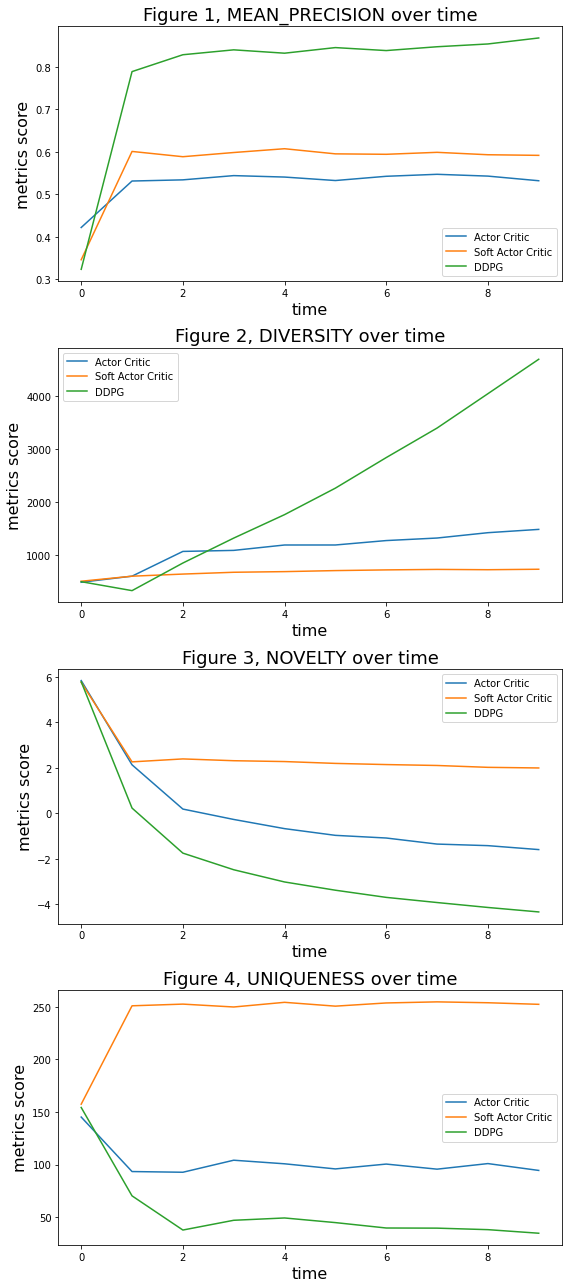

In [7]:
plt.figure(figsize=(8,18))
 
# 左上
plt.subplot(4,1,1)
draw_single(metrics, 'MEAN_PRECISION', 1)
 
# 右上
plt.subplot(4,1,2)
draw_single(metrics, 'DIVERSITY', 2)
 
# 左下
plt.subplot(4,1,3)
draw_single(metrics, 'NOVELTY', 3)

 
# 右下
plt.subplot(4,1,4)
draw_single(metrics, 'UNIQUENESS', 4)

# 右下


plt.tight_layout()
plt.savefig("metrics.png", format="png", dpi=300)
plt.show()

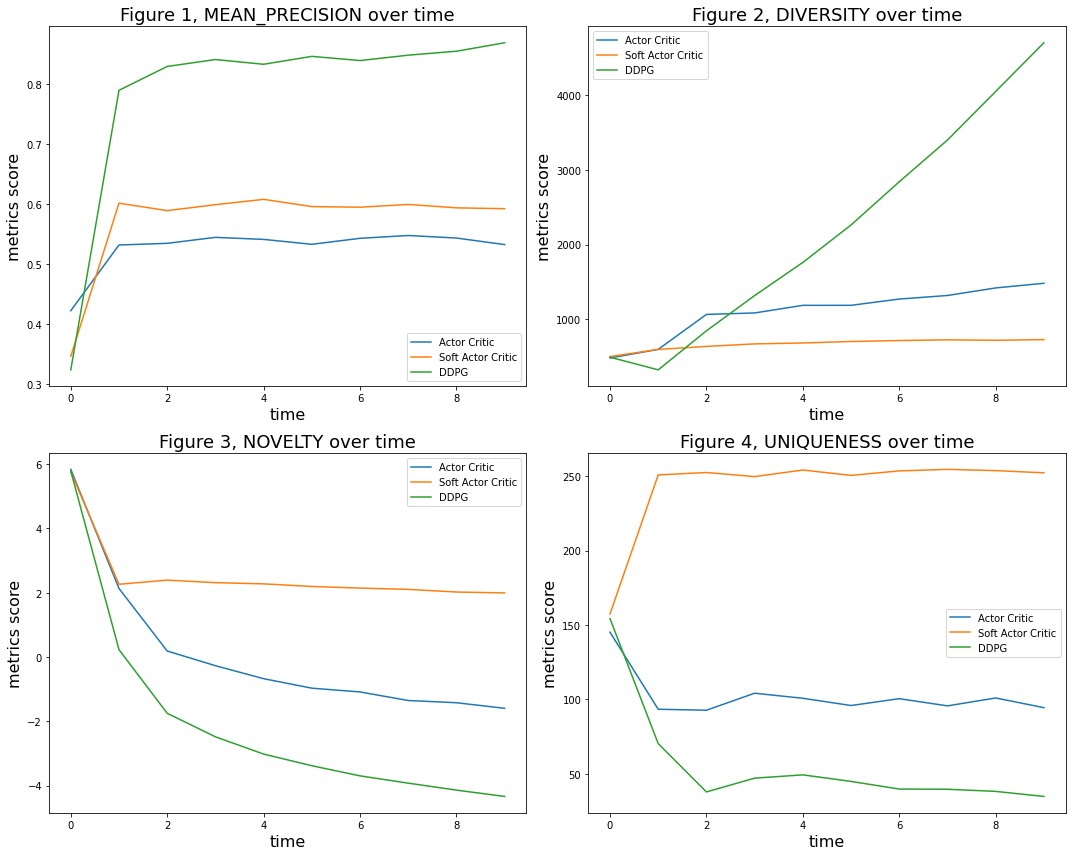

In [ ]:
plt.figure(figsize=(15,12))
 
# 左上
plt.subplot(2,2,1)
draw_single(metrics, 'MEAN_PRECISION', 1)
 
# 右上
plt.subplot(2,2,2)
draw_single(metrics, 'DIVERSITY', 2)
 
# 左下
plt.subplot(2,2,3)
draw_single(metrics, 'NOVELTY', 3)

 
# 右下
plt.subplot(2,2,4)
draw_single(metrics, 'UNIQUENESS', 4)

# 右下


plt.tight_layout()
plt.savefig("metrics.png", format="png", dpi=300)
plt.show()

In [ ]:
import pandas as pd
import torch 
import numpy as np
import matplotlib.pyplot as plt
import os


log_name = '2022_07_12_22_38_32'


class LogHandler:
    def __init__(self, log_name):
        self.base_dir = os.path.join('./log/{}'.format(log_name))

    def load(self, name):
        path = os.path.join(self.base_dir, name)
        return torch.load(path)

    #def plot_precision
    
log_handler = LogHandler(log_name)

hist = log_handler.load('ratings_1.csv')

In [ ]:
log_handler.load('pred_ratings_4.csv')[log_handler.load('pred_ratings_4.csv').Rating == 0]

,UserID,MovieID,Rating,Timestamp,Score
10,1165.0,3847.0,0.0,1.657658e+09,0.000047
12,1165.0,3454.0,0.0,1.657658e+09,0.023262
13,1165.0,701.0,0.0,1.657658e+09,0.004729
14,1165.0,3454.0,0.0,1.657658e+09,0.023262
18,1165.0,2664.0,0.0,1.657658e+09,0.139482
...,...,...,...,...,...
6020,1113.0,3605.0,0.0,1.657658e+09,0.000370
6021,1113.0,3520.0,0.0,1.657658e+09,0.000641
6023,1113.0,2259.0,0.0,1.657658e+09,0.000679
6024,1113.0,138.0,0.0,1.657658e+09,0.000114


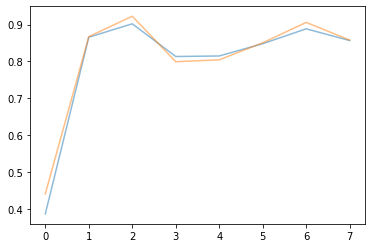

In [ ]:
log_metrics_df = log_handler.load('log_metrics.csv')
dim = log_metrics_df.shape[0]



plt.plot(np.arange(dim), log_metrics_df.MAP, alpha=0.5)
plt.plot(np.arange(dim), log_metrics_df.MRR, alpha=0.5)

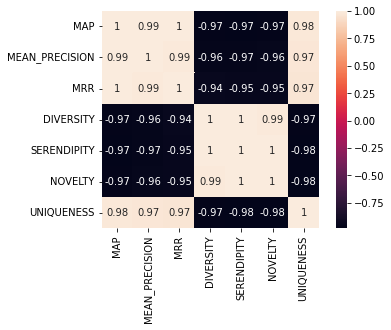

In [ ]:
import seaborn as sns
sns.heatmap(log_metrics_df.corr(), square=True, annot=True)
plt.savefig("heatmap.png", format="png", dpi=300)

In [ ]:

#sns.pairplot(log_metrics_df)
#plt.savefig("pairplot.png", format="png", dpi=300)

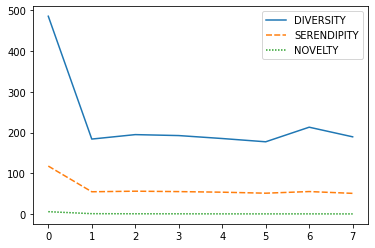

In [ ]:
sns.lineplot(data=log_metrics_df[['DIVERSITY', 'SERENDIPITY', 'NOVELTY']])
plt.savefig("Diversity_base.png", format="png", dpi=300)

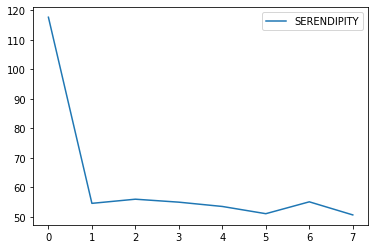

In [ ]:
sns.lineplot(data=log_metrics_df[['SERENDIPITY']])

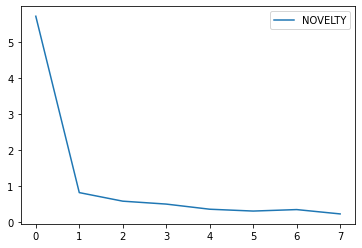

In [ ]:
sns.lineplot(data=log_metrics_df[['NOVELTY']])

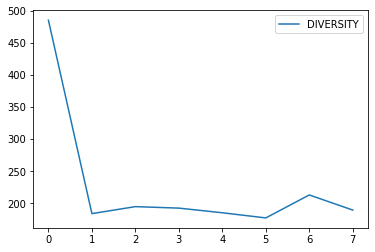

In [ ]:
sns.lineplot(data=log_metrics_df[['DIVERSITY']])

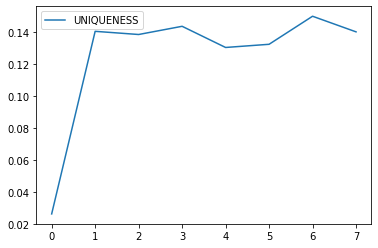

In [ ]:
sns.lineplot(data=log_metrics_df[['UNIQUENESS']])
plt.savefig("UNIQUENESS.png", format="png", dpi=300)

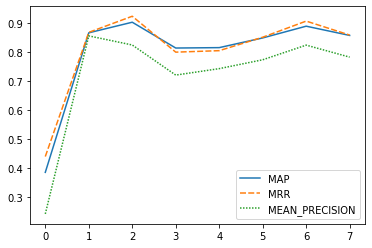

In [ ]:
sns.lineplot(data=log_metrics_df[['MAP', 'MRR', 'MEAN_PRECISION']])
plt.savefig("precision_base.png", format="png", dpi=300)

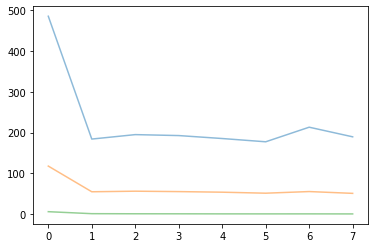

In [ ]:
plt.plot(np.arange(dim), log_metrics_df.DIVERSITY, alpha=0.5)
plt.plot(np.arange(dim), log_metrics_df.SERENDIPITY, alpha=0.5)
plt.plot(np.arange(dim), log_metrics_df.NOVELTY, alpha=0.5)

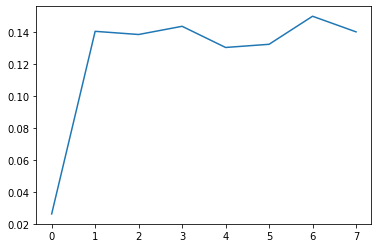

In [ ]:
plt.plot(np.arange(dim), log_metrics_df.UNIQUENESS)

In [ ]:
log_metrics_df

,MAP,MEAN_PRECISION,MRR,DIVERSITY,SERENDIPITY,NOVELTY,UNIQUENESS
0,0.385827,0.242930,0.440198,485.550913,117.663050,5.721101,0.026159
1,0.865522,0.854967,0.867116,184.006277,54.614555,0.819260,0.140397
2,0.901938,0.823675,0.922507,194.918856,56.019816,0.581126,0.138411
3,0.813224,0.720199,0.799074,192.592796,55.014911,0.500064,0.143543
4,0.814618,0.742384,0.804175,185.340229,53.557297,0.357383,0.130298
5,0.847949,0.772848,0.850371,177.313075,51.109551,0.306130,0.132285
6,0.888313,0.823179,0.905803,213.136226,55.131517,0.347355,0.149834
7,0.856582,0.781954,0.857858,189.516148,50.694973,0.226847,0.140066


In [ ]:
for i in np.arange(20):
    log = './log/2022_07_09_22_53_13/pred_ratings_{}.csv'.format(i)
    df = torch.load(log)
    print('='*10, i, 'step', '='*10)
    print('all df : ',  len(df))
    print('rating zero :', len(df[df.Rating==0]))


FileNotFoundError: ignored

In [ ]:
d = {
    'k': 100
}

In [ ]:
if 'k' in d.keys():
    print('hu')

In [ ]:
import itertools
list(itertools.product([1,2], []))

In [ ]:
import pandas as pd

d = pd.DataFrame({
    'p':[1,2,3,4],
    'p-1':[1,2,3,4]
})

In [ ]:
d.p.sum()

In [ ]:
(d == d.copy()).all().all()